## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [2]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [4]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [6]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

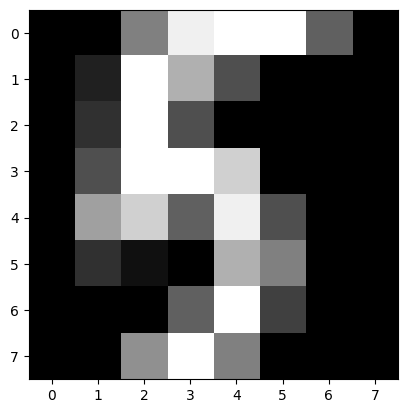

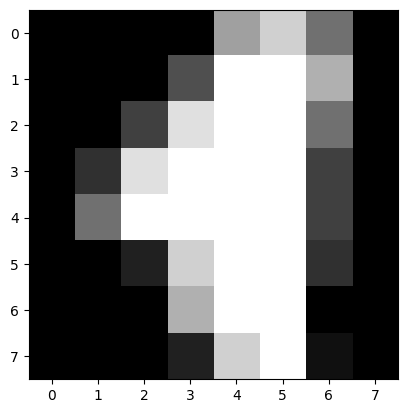

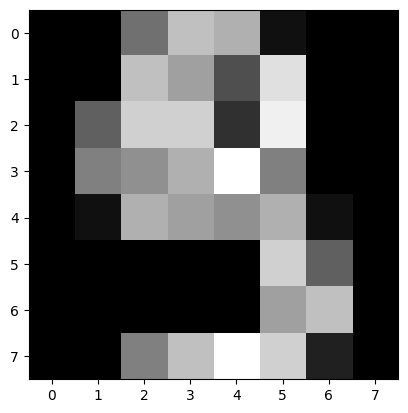

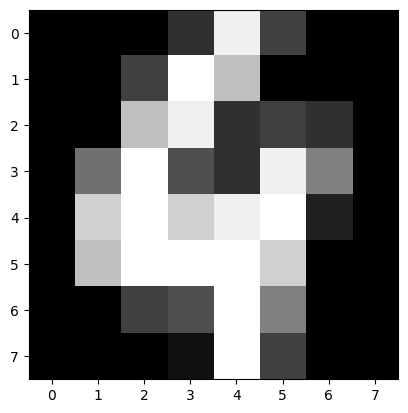

In [8]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [9]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

### Neural Net

In [10]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: user 2.86 s, sys: 1.95 s, total: 4.81 s
Wall time: 4.54 s


In [11]:
%%time
y_pred = ann.predict(X_test)

CPU times: user 2.68 ms, sys: 3.85 ms, total: 6.52 ms
Wall time: 8.21 ms


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       1.00      1.00      1.00        35
           2       0.97      1.00      0.99        36
           3       0.95      0.98      0.96        41
           4       0.95      0.97      0.96        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## With RandomizedSearchCV

In [13]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (50,), (70,),(50,30), (40,20), (60,40, 20), (70,50,40)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (60, 40, 20), 'alpha': 1, 'activation': 'tanh'}
CPU times: user 18.4 s, sys: 8.57 s, total: 26.9 s
Wall time: 22min 45s


In [14]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      1.00      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.97      1.00      0.99        38
           5       0.97      0.97      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        37
           8       0.97      1.00      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

CPU times: user 29.2 ms, sys: 7.69 ms, total: 36.9 ms
Wall time: 27.5 ms


## With GridSearchCV

In [15]:
%%time

score_measure = "accuracy"
kfolds = 5

param_grid = {
    'hidden_layer_sizes': [ (30,), (50,), (70,), (90,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [.5, .7, 1],
    'learning_rate': ['adaptive', 'invscaling'],
    'learning_rate_init': [0.005, 0.01, 0.15],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

bestRecallTree = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'activation': 'relu', 'alpha': 0.7, 'hidden_layer_sizes': (90,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.01, 'max_iter': 5000, 'solver': 'adam'}
CPU times: user 8.76 s, sys: 1.98 s, total: 10.7 s
Wall time: 11min 55s


In [16]:
%%time
y_pred = bestRecallTree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       0.97      1.00      0.99        38
           5       0.97      0.97      0.97        30
           6       0.97      1.00      0.99        37
           7       1.00      0.92      0.96        37
           8       0.93      0.97      0.95        29
           9       0.89      0.97      0.93        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

CPU times: user 19.9 ms, sys: 15.2 ms, total: 35.2 ms
Wall time: 25.7 ms


## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [28]:
c_matrix = confusion_matrix(y_test, classifier.predict(X_test))

In [30]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.91      0.83      0.87        35
           2       0.89      0.86      0.87        36
           3       0.80      0.68      0.74        41
           4       0.76      0.89      0.82        38
           5       0.85      0.97      0.91        30
           6       0.88      1.00      0.94        37
           7       0.94      0.84      0.89        37
           8       0.83      0.86      0.85        29
           9       0.74      0.74      0.74        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



## Decision tree model using the randomsearch

In [32]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,60),  
    'min_samples_leaf': np.arange(1,50),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 200), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=500,
                           scoring=score_measure, verbose=1, n_jobs=-1, return_train_score=True)

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The best accuracy score is 0.8455260356174991
... with parameters: {'min_samples_split': 9, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0011, 'max_leaf_nodes': 183, 'max_depth': 17, 'criterion': 'entropy'}


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_p

In [37]:
print(classification_report(y_test, bestRecallTree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.91      0.89      0.90        35
           2       0.92      0.92      0.92        36
           3       0.87      0.83      0.85        41
           4       0.79      0.89      0.84        38
           5       0.88      0.97      0.92        30
           6       0.97      0.97      0.97        37
           7       0.97      0.81      0.88        37
           8       0.96      0.90      0.93        29
           9       0.81      0.88      0.85        34

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360



## Decision tree model using the Gridsearch

In [ ]:
{'min_samples_split': 9, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0011, 'max_leaf_nodes': 183, 'max_depth': 17, 'criterion': 'entropy'}

In [39]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(8,10),  
    'min_samples_leaf': np.arange(1,3),
    'min_impurity_decrease': np.arange(0.001, 0.002, 0.0001),
    'max_leaf_nodes': np.arange(180,185), 
    'max_depth': np.arange(16,18), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
The best accuracy score is 0.8559741579558654
... with parameters: {'criterion': 'entropy', 'max_depth': 17, 'max_leaf_nodes': 184, 'min_impurity_decrease': 0.0011, 'min_samples_leaf': 1, 'min_samples_split': 8}


In [40]:
print(classification_report(y_test, bestRecallTree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.97      0.91      0.94        35
           2       0.92      0.92      0.92        36
           3       0.83      0.85      0.84        41
           4       0.92      0.89      0.91        38
           5       0.78      0.97      0.87        30
           6       0.97      0.95      0.96        37
           7       0.94      0.81      0.87        37
           8       1.00      0.86      0.93        29
           9       0.81      0.88      0.85        34

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360



## We can observe that the accuracy of Neural Net with GridsearchCV is 97% where as the accury of Decision Tree with GridsearchCV is 90%.
## Hence, we can say that Neural Net performs better than Decision tree model.